In [1]:
# Day 5 - Collaborative Filtering Movie Recommendation System

# --------------------------
# 1. Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")


In [3]:
# --------------------------
# 2. Load Dataset
# --------------------------
movies = pd.read_csv("../Data/movies.csv")
ratings = pd.read_csv("../Data/ratings.csv")

print("Movies Data:")
print(movies.head())

print("\nRatings Data:")
print(ratings.head())

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
# --------------------------
# 3. Merge Datasets
# --------------------------
df = ratings.merge(movies, on='movieId')
print("\nMerged Data:")
print(df.head())


Merged Data:
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [5]:
# --------------------------
# 4. Create User-Movie Ratings Matrix
# --------------------------
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
print("\nUser-Movie Matrix Shape:", user_movie_matrix.shape)



User-Movie Matrix Shape: (610, 9719)


In [6]:
# --------------------------
# 5. Similarity Calculation
# --------------------------
movie_similarity = cosine_similarity(user_movie_matrix.fillna(0).T)
movie_similarity_df = pd.DataFrame(movie_similarity, 
                                   index=user_movie_matrix.columns, 
                                   columns=user_movie_matrix.columns)

In [7]:
# --------------------------
# 6. Recommendation Function
# --------------------------
def recommend_movies(movie_name, n=5):
    if movie_name not in movie_similarity_df.columns:
        return f"Movie '{movie_name}' not found in the database."
    similar_movies = movie_similarity_df[movie_name].sort_values(ascending=False)[1:n+1]
    return similar_movies

In [8]:
# --------------------------
# 7. Test the Recommendation System
# --------------------------
print("\nRecommendations for 'Toy Story (1995)':")
print(recommend_movies('Toy Story (1995)'))


Recommendations for 'Toy Story (1995)':
title
Toy Story 2 (1999)                           0.572601
Jurassic Park (1993)                         0.565637
Independence Day (a.k.a. ID4) (1996)         0.564262
Star Wars: Episode IV - A New Hope (1977)    0.557388
Forrest Gump (1994)                          0.547096
Name: Toy Story (1995), dtype: float64


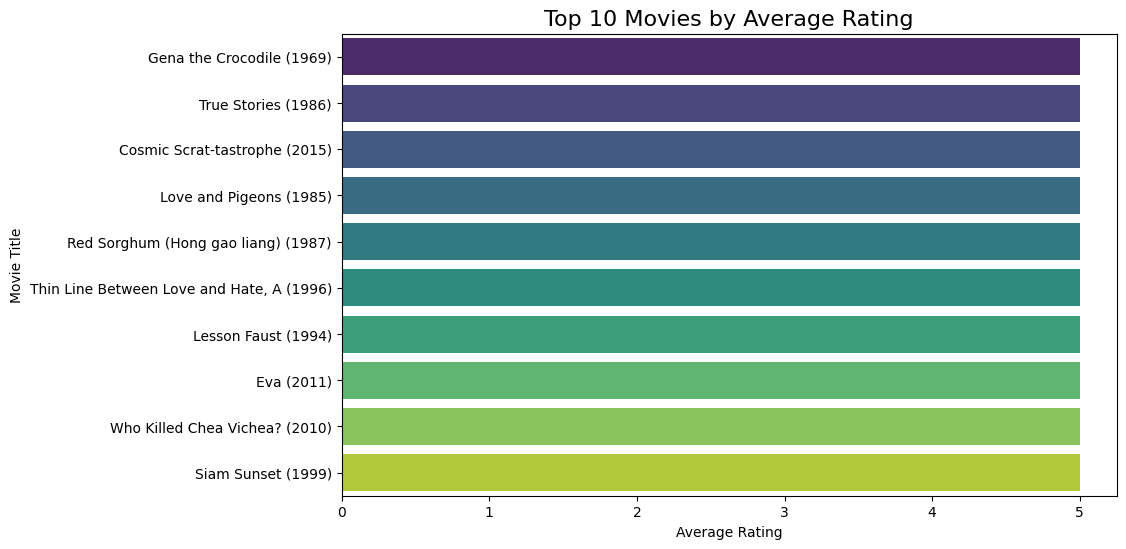

In [9]:
# --------------------------
# 8. Visualization - Top Rated Movies
# --------------------------
top_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title('Top 10 Movies by Average Rating', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.savefig("../images/top10_movies.png")
plt.show()